### A k-means clustering project by **`Gurpreet Singh`**

# k-means Clustering

## Importing the Libraries
We import all the libraries used in this task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the data
We import the iris dataset

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data Preprocessing
Only keep the data which is useful for clustering.

In [3]:
X = iris_df.iloc[:, [0,1,2,3]].values

## Finding the optimum number of clusters using *`The Elbow Method`*

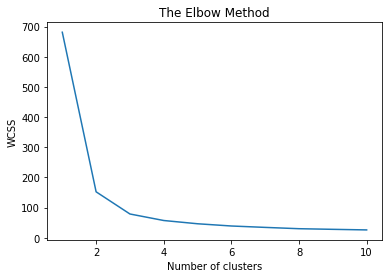

In [4]:
from sklearn.cluster import KMeans
wcss = []      # within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


# Plotting the elbow curv
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The above method is known as `The Elbow Method` because the optimum number of cluster is where the elbow occurs. From the above graph, we can see that the elbow occurs at 3. 

so, we choose the number of clusters as **3**.

## Modelling
Applying kmeans clustering to dataset.

In [5]:
kmeans = KMeans(n_clusters=3, 
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [6]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualization
1. Visualizing the clusters for first two columns.

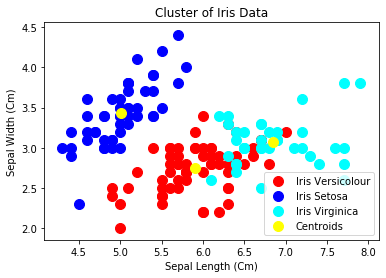

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Iris Versicolour')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Iris Setosa')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='cyan', label='Iris Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')

plt.legend()
plt.title('Cluster of Iris Data')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.show()

2. Visualizing the clusters for 3rd and 4th column.

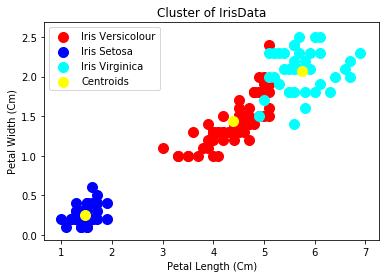

In [8]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s=100, c='red', label='Iris Versicolour')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s=100, c='blue', label='Iris Setosa')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s=100, c='cyan', label='Iris Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s=100, c='yellow', label='Centroids')

plt.title('Cluster of IrisData')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.legend()
plt.show()